# 11.4 随机梯度下降
- **目录**
  - 11.4.1 随机梯度更新
  - 11.4.2 动态学习率
  - 11.4.3 凸目标的收敛性分析
  - 11.4.4 随机梯度和有限样本


- 在前面的章节中，我们一直在训练过程中使用随机梯度下降，但没有解释它为什么起作用。
- 为了澄清这一点，我们刚在 11.3节中描述了梯度下降的基本原则。
- 在本节中，我们继续更详细地说明**随机梯度下降（stochastic gradient descent）**。

In [1]:
%matplotlib inline
import math
import torch
from d2l import torch as d2l

## 11.4.1 随机梯度更新

- 在深度学习中，目标函数通常是训练数据集中每个样本的损失函数的平均值。

- 给定$n$个样本的训练数据集，我们假设$f_i(\mathbf{x})$是关于索引$i$的训练样本的损失函数，其中$\mathbf{x}$是参数向量。然后我们得到目标函数

$$f(\mathbf{x}) = \frac{1}{n} \sum_{i = 1}^n f_i(\mathbf{x}) \tag{11.4.1}$$

- $\mathbf{x}$的目标函数的梯度计算为
$$\nabla f(\mathbf{x}) = \frac{1}{n} \sum_{i = 1}^n \nabla f_i(\mathbf{x})\tag{11.4.2}$$

- 如果使用梯度下降法，则每个自变量迭代的**计算代价为$\mathcal{O}(n)$，它随$n$线性增长**。因此，当训练数据集较大时，每次迭代的梯度下降计算代价将较高。

- 随机梯度下降（SGD）可降低每次迭代时的计算代价。在随机梯度下降的每次迭代中，我们对数据样本**随机均匀采样**一个索引$i$，其中$i\in\{1,\ldots, n\}$，并计算梯度$\nabla f_i(\mathbf{x})$以更新$\mathbf{x}$：
$$\mathbf{x} \leftarrow \mathbf{x} - \eta \nabla f_i(\mathbf{x})\tag{11.4.3}$$
  其中$\eta$是学习率。我们可以看到，每次迭代的计算代价从梯度下降的$\mathcal{O}(n)$降至常数$\mathcal{O}(1)$。
- 此外，我们要强调，随机梯度$\nabla f_i(\mathbf{x})$是对完整梯度$\nabla f(\mathbf{x})$的**无偏估计**，因为
$$\mathbb{E}_i \nabla f_i(\mathbf{x}) = \frac{1}{n} \sum_{i = 1}^n \nabla f_i(\mathbf{x}) = \nabla f(\mathbf{x}) \tag{11.4.4}$$
  这意味着，**平均而言，随机梯度是对梯度的良好估计**。即虽然每次迭代中随机采样的梯度 $ \nabla f_i(\mathbf{x}) $ 可能与真实梯度 $ \nabla f(\mathbf{x}) $ 不完全相同，但**在多次采样的平均意义上，随机梯度等价于真实梯度**。

- **无偏性**是随机梯度下降的一项重要性质。它**确保随机梯度下降在长期迭代过程中能够收敛到与梯度下降相同的最优解**（假设学习率足够小且满足一定条件）。虽然随机梯度在每次迭代中可能偏离真实梯度，但在**均值意义上，它提供了对真实梯度的良好估计**。

- 现在，我们将把它与梯度下降进行比较，方法是向梯度添加均值为0、方差为1的随机噪声，以模拟随机梯度下降。

- **要点：**
  - 目标函数：
    - 在深度学习中，通常希望找到一组参数，使得某个“目标函数”最小。
    - 目标函数是训练样本损失的**平均值**。
    - 每个训练样本都有自己的损失，这个损失告诉模型对该样本的预测有多糟糕。
    - 因此，目的是找到一组参数，使得所有样本的平均损失最小。
  - 梯度下降法：
    - 为了找到最小化目标函数的参数，可以使用梯度下降法。
    - 在每次迭代中，计算目标函数的梯度（即斜率），然后沿着斜率的**反方向移动**一小步。
    - 想象自己在山坡上，梯度就是山坡的斜率，想沿着斜坡下山。
    - 问题在于，计算整个数据集的梯度可能代价非常高昂，特别是当数据集很大时。
    - **每次迭代都要计算所有样本的损失和梯度，然后取平均**。
  - 随机梯度下降法（SGD）
    - 随机梯度下降法是梯度下降法的一种**计算成本更低的版本**。
    - 每次迭代时，不是计算所有样本的梯度，而是随机选择一个样本，并只计算那个样本的梯度。
    - 然后按照这个随机梯度下山一小步。
    - 这大大降低了每次迭代的计算成本。与计算所有样本的梯度相比，计算一个样本的梯度要快得多。
    - 因此，每次迭代的计算代价从梯度下降的**线性级别**降至**常数级别**。
  - 随机梯度的无偏估计
    - 随机梯度虽然是基于单个样本的，但它仍然是一个“无偏估计”——
      - 即：如果多次计算随机梯度并取平均值，将得到整个数据集梯度的精确值。
    - 因此，随机梯度是对整个数据集梯度的良好估计。
  - 随机梯度下降法是一种在大数据集上更高效的优化技术。通过每次迭代只使用一个随机样本的梯度，它能够大大降低计算成本，同时保持良好的收敛性能。这使得在大数据集上快速地训练深度学习模型成为可能。

In [2]:
def f(x1, x2):  # 目标函数
    return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2):  # 目标函数的梯度
    return 2 * x1, 4 * x2

In [3]:
def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    # 模拟有噪声的梯度
    g1 += torch.normal(0.0, 1, (1,)).item()
    g2 += torch.normal(0.0, 1, (1,)).item()
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

epoch 50, x1: 0.169390, x2: -0.054481


F:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


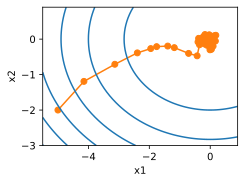

In [4]:
def constant_lr():
    return 1

eta = 0.1
lr = constant_lr  # 常数学习速度
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

正如我们所看到的，随机梯度下降中变量的轨迹比我们在 11.3节中观察到的梯度下降中观察到的**轨迹嘈杂得多**。这是由于**梯度的随机性质**。也就是说，即使我们接近最小值，我们仍然受到通过$\eta \nabla f_i(\mathbf{x})$的**瞬间梯度**所注入**不确定性的影响**。即使经过50次迭代，质量仍然不那么好。更糟糕的是，**经过额外的步骤，它不会得到改善**（我们鼓励你尝试更多的步骤来确认这一点）。这给我们留下了唯一的选择：**改变学习率**$\eta$。但是，如果我们选择的学习率太小，我们一开始就不会取得任何有意义的进展。另一方面，如果我们选择的学习率太大，我们将无法获得一个好的解决方案，如上所示。解决这些相互冲突的目标的唯一方法是**在优化过程中*动态*降低学习率。**

这也是在`sgd`步长函数中添加学习率函数`lr`的原因。在上面的示例中，学习率调度的任何功能都处于休眠状态，因为我们将相关的`lr`函数设置为常量。

- **要点：**
  - **轨迹的嘈杂性**：
    - 随机梯度下降的轨迹比普通梯度下降更嘈杂。
    - 这种嘈杂是由于梯度的随机性造成的。
  - **接近最小值的不确定性**：
    - 即使接近最小值，也会受到随机梯度所带来的不确定性影响。
    - 即使迭代多次，也可能不会获得非常好的解。
  - **学习率的挑战**：
    - 如果学习率太小，可能不会取得有意义的进展。
    - 如果学习率太大，可能无法获得良好的解。
  - **动态降低学习率的必要性**：
    - 为了解决学习率的挑战，必须在优化过程中**动态调整学习率**。
    - 这样可以在快速接近解的同时，确保解的精确性。
  - **学习率调度的实现**：
    - 在随机梯度下降的步长函数中添加了**学习率函数**以实现动态学习率。
    - 在给定示例中，**学习率调度**未激活，因为学习率设置为常量。

## 11.4.2 动态学习率

- 用与**时间相关的学习率**$\eta(t)$取代$\eta$增加了控制优化算法收敛的复杂性。
- 特别是需要弄清$\eta$的衰减速度。
  - 如果太快，将过早停止优化。
  - 如果减少的太慢，我们会在优化上浪费太多时间。
- 以下是随着时间推移调整$\eta$时使用的一些基本策略（稍后我们将讨论更高级的策略）：
$$
\begin{aligned}
    \eta(t) & = \eta_i \text{ if } t_i \leq t \leq t_{i+1}  && \text{分段常数} \\
    \eta(t) & = \eta_0 \cdot e^{-\lambda t} && \text{指数衰减} \\
    \eta(t) & = \eta_0 \cdot (\beta t + 1)^{-\alpha} && \text{多项式衰减}
\end{aligned}
$$
- 在第一个**分段常数（piecewise constant）** 场景中，会降低学习率
  - 例如，每当优化进度停顿时使用该策略，这是训练深度网络的常见策略。
- 或者通过**指数衰减（exponential decay）** 来更积极地减低学习率。
  - 不幸的是，这往往会导致算法收敛之前过早停止。
- 一个受欢迎的选择是$\alpha = 0.5$的**多项式衰减（polynomial decay）**。
  - 在凸优化的情况下，有许多证据表明这种速率表现良好。


epoch 1000, x1: -0.759637, x2: -0.006569


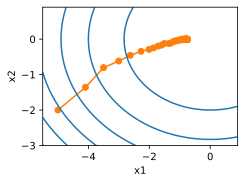

In [5]:
def exponential_lr():
    # 在函数外部定义，而在内部更新的全局变量
    global t
    t += 1
    return math.exp(-0.1 * t)

t = 1
lr = exponential_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=1000, f_grad=f_grad))

- 正如预期的那样，参数的**方差大大减少**。
- 但是，这是以未能收敛到最优解$\mathbf{x} = (0, 0)$为代价的。
  - 即使经过1000个迭代后，仍然离最优解很远；
  - 事实上，该算法根本无法收敛。

- 另一方面，如果使用多项式衰减，其中学习率随迭代次数的平方根倒数衰减，那么仅在50次迭代之后，收敛就会更好。
   -  多项式衰：$\eta(t)  = \eta_0 \cdot (\beta t + 1)^{-\alpha} $

epoch 50, x1: -0.085900, x2: 0.042673


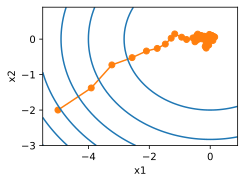

In [6]:
def polynomial_lr():
    # 在函数外部定义，而在内部更新的全局变量
    global t
    t += 1
    return (1 + 0.1 * t) ** (-0.5)

t = 1
lr = polynomial_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

- 关于如何设置学习率，还有更多的选择。
  - 例如，我们可以从较小的学习率开始，然后使其迅速上涨，再让它降低，尽管这会更慢。
  - 甚至可以在较小和较大的学习率之间切换等多种**学习率调度计划**。
- 现在专注于可以进行全面理论分析的学习率计划，即**凸环境下的学习率**。
- 对于一般的非凸问题，很难获得有意义的收敛保证，因为总的来说，最大限度地减少非线性非凸问题是NP困难的。
- 有关的研究调查，请参阅例如2015年Tibshirani的优秀[讲义笔记](https://www.stat.cmu.edu/~ryantibs/convexopt-F15/lectures/26-nonconvex.pdf)。

--------
- **说明：何为NP问题**
  - 在计算复杂性理论中，P和NP是两个重要的问题类别。
  - **P** 代表 "Polynomial time"，即**多项式时间**。P类的问题是那些可以在多项式时间内（相对于输入大小）由确定性图灵机解决的问题。多项式时间意味着解决问题所需的时间与输入大小的某个固定幂成正比。直观地说，**P类问题可以在合理的时间内求解**。
  - **NP** 代表 "Nondeterministic Polynomial time"，即**非确定性多项式时间**。
    - NP类问题是可以在**多项式时间内由非确定性图灵机验证解决方案的问题**。
    - 非确定性是指计算模型可以同时**探索多个可能的解决方案路径，然后选择正确的路径**。
    - 如果已经有了一个潜在的解决方案，则可以在合理的时间内验证它是否正确。
    - NP类问题的特点是解的验证相对容易，但找到解可能困难。
  - P代表可以在合理时间内解决的问题，而NP代表解的验证可以在合理时间内进行，但找到解可能困难。
  - NP困难和NP完全问题与这些类别有关，代表了更复杂和更困难的问题。
  - P vs NP问题，即P类是否等于NP类，是计算机科学中尚未解决的重要问题之一。
  - 如果P = NP，那么意味着每个解可以在多项式时间内验证的问题也可以在多项式时间内解决。
  - 目前还没有人能证明P是否等于NP，这个问题是数学和计算机科学的核心难题之一。
------------

## 11.4.3 凸目标的收敛性分析

以下对凸目标函数的随机梯度下降的收敛性分析是可选的，主要用于传达对问题的更多直觉。存在着明显更先进的证明技术，例如，当**目标函数表现特别好时**。

假设所有$\boldsymbol{\xi}$的目标函数$f(\boldsymbol{\xi}, \mathbf{x})$在$\mathbf{x}$中都是凸的。更具体地说，我们考虑随机梯度下降更新：

$$\mathbf{x}_{t+1} = \mathbf{x}_{t} - \eta_t \partial_\mathbf{x} f(\boldsymbol{\xi}_t, \mathbf{x}) \tag{11.4.6}$$

其中$f(\boldsymbol{\xi}_t, \mathbf{x})$是训练样本$f(\boldsymbol{\xi}_t, \mathbf{x})$的目标函数：$\boldsymbol{\xi}_t$从第$t$步的某个分布中提取，$\mathbf{x}$是模型参数。用

$$R(\mathbf{x}) = E_{\boldsymbol{\xi}}[f(\boldsymbol{\xi}, \mathbf{x})] \tag{11.4.7}$$

表示期望风险，$R^*$表示对于$\mathbf{x}$的最低风险。最后让$\mathbf{x}^*$表示最小值（我们假设它存在于定义$\mathbf{x}$的域中）。在这种情况下，我们可以跟踪时间$t$处的当前参数$\mathbf{x}_t$和风险最小化器$\mathbf{x}^*$之间的距离，看看它是否随着时间的推移而改善：

$$\begin{aligned}    &\|\mathbf{x}_{t+1} - \mathbf{x}^*\|^2 \\ =& \|\mathbf{x}_{t} - \eta_t \partial_\mathbf{x} f(\boldsymbol{\xi}_t, \mathbf{x}) - \mathbf{x}^*\|^2 \\    =& \|\mathbf{x}_{t} - \mathbf{x}^*\|^2 + \eta_t^2 \|\partial_\mathbf{x} f(\boldsymbol{\xi}_t, \mathbf{x})\|^2 - 2 \eta_t    \left\langle \mathbf{x}_t - \mathbf{x}^*, \partial_\mathbf{x} f(\boldsymbol{\xi}_t, \mathbf{x})\right\rangle.   \end{aligned} \tag{11.4.8}$$

我们假设随机梯度$\partial_\mathbf{x} f(\boldsymbol{\xi}_t, \mathbf{x})$的$L_2$范数受到某个常数$L$的限制(即**Lipschitz常数**，见8.5.5 梯度裁剪)，因此我们有

$$\eta_t^2 \|\partial_\mathbf{x} f(\boldsymbol{\xi}_t, \mathbf{x})\|^2 \leq \eta_t^2 L^2 \tag{11.4.9}$$

Lipschitz 常数 $ L $ 控制了函数梯度变化的快慢。如果 $ L $ 很大，说明梯度变化很快，函数的曲率可能很大；如果 $ L $ 很小，说明梯度变化缓慢，函数较为平滑。

此处最感兴趣的是$\mathbf{x}_t$和$\mathbf{x}^*$之间的距离如何变化的**期望**。事实上，对于任何具体的步骤序列，距离可能会增加，这取决于我们遇到的$\boldsymbol{\xi}_t$。因此我们需要**点积的边界**。因为对于任何凸函数$f$，所有$\mathbf{x}$和$\mathbf{y}$都满足$f(\mathbf{y}) \geq f(\mathbf{x}) + \langle f'(\mathbf{x}), \mathbf{y} - \mathbf{x} \rangle$，按凸性我们有

$$f(\boldsymbol{\xi}_t, \mathbf{x}^*) \geq f(\boldsymbol{\xi}_t, \mathbf{x}_t) + \left\langle \mathbf{x}^* - \mathbf{x}_t, \partial_{\mathbf{x}} f(\boldsymbol{\xi}_t, \mathbf{x}_t) \right\rangle \tag{11.4.10}$$


将不等式 (公式11.4.9)和 (公式11.4.10)代入公式11.4.8我们在时间$t+1$时获得参数之间距离的边界，如下所示：

$$\|\mathbf{x}_{t} - \mathbf{x}^*\|^2 - \|\mathbf{x}_{t+1} - \mathbf{x}^*\|^2 \geq 2 \eta_t (f(\boldsymbol{\xi}_t, \mathbf{x}_t) - f(\boldsymbol{\xi}_t, \mathbf{x}^*)) - \eta_t^2 L^2 \tag{11.4.11}$$


这意味着，只要当前损失和最优损失之间的差异超过$\eta_t L^2/2$，我们就会取得进展。由于这种差异必然会收敛到零，因此学习率$\eta_t$也需要**消失**。

接下来，我们根据同时11.4.11取期望。得到

$$E\left[\|\mathbf{x}_{t} - \mathbf{x}^*\|^2\right] - E\left[\|\mathbf{x}_{t+1} - \mathbf{x}^*\|^2\right] \geq 2 \eta_t [E[R(\mathbf{x}_t)] - R^*] -  \eta_t^2 L^2 \tag{11.4.12}$$

最后一步是对$t \in \{1, \ldots, T\}$的不等式求和。在求和过程中抵消中间项，然后舍去低阶项。
对 $ t \in \{1, \ldots, T\} $ 的不等式求和：
$$
\sum_{t=1}^T \Big(E\left[\|\mathbf{x}_{t} - \mathbf{x}^*\|^2\right] - E\left[\|\mathbf{x}_{t+1} - \mathbf{x}^*\|^2\right]\Big) \geq \sum_{t=1}^T \Big(2 \eta_t \big(E[R(\mathbf{x}_t)] - R^*\big) - \eta_t^2 L^2\Big).
$$

左边展开：
$$\begin{aligned} 
&\Big(E\left[\|\mathbf{x}_1 - \mathbf{x}^*\|^2\right] - E\left[\|\mathbf{x}_2 - \mathbf{x}^*\|^2\right]\Big)\\
+& \Big(E\left[\|\mathbf{x}_2 - \mathbf{x}^*\|^2\right] - E\left[\|\mathbf{x}_3 - \mathbf{x}^*\|^2\right]\Big)
+& \cdots \\
+& \Big(E\left[\|\mathbf{x}_T - \mathbf{x}^*\|^2\right] - E\left[\|\mathbf{x}_{T+1} - \mathbf{x}^*\|^2\right]\Big).
\end{aligned} $$

左边剩下：
$$
E\left[\|\mathbf{x}_1 - \mathbf{x}^*\|^2\right] - E\left[\|\mathbf{x}_{T+1} - \mathbf{x}^*\|^2\right].
$$

在优化问题中，通常关心的是当 $ T \to \infty $ 时的收敛性。因此，右侧的最后一项 $ E\left[\|\mathbf{x}_{T+1} - \mathbf{x}^*\|^2\right] $ 可以被认为是一个小量，特别是当学习率 $ \eta_t $ 逐渐减小时，参数更新的幅度会变小，最终 $ \mathbf{x}_{T+1} $ 会逐渐接近最优解 $ \mathbf{x}^* $。因此，可以将 $ E\left[\|\mathbf{x}_{T+1} - \mathbf{x}^*\|^2\right] $ 舍去。舍去低阶项后：
$$
E\left[\|\mathbf{x}_1 - \mathbf{x}^*\|^2\right] - E\left[\|\mathbf{x}_{T+1} - \mathbf{x}^*\|^2\right] \approx E\left[\|\mathbf{x}_1 - \mathbf{x}^*\|^2\right].
$$


最终得到：
$$\|\mathbf{x}_1 - \mathbf{x}^*\|^2 \geq 2 \left (\sum_{t=1}^T   \eta_t \right) [E[R(\mathbf{x}_t)] - R^*] - L^2 \sum_{t=1}^T \eta_t^2 \tag{11.4.13}$$


请注意，我们利用了给定的$\mathbf{x}_1$，因而可以去掉期望。最后定义

$$\bar{\mathbf{x}} \stackrel{\mathrm{def}}{=} \frac{\sum_{t=1}^T \eta_t \mathbf{x}_t}{\sum_{t=1}^T \eta_t} \tag{11.4.14}$$

$ \bar{\mathbf{x}} $ 是对所有解 $ \mathbf{x}_t $ 的加权平均，权重由 $ \eta_t $ 确定，引入 $ \bar{\mathbf{x}} $ 的目的是为了平滑优化路径，减小随机梯度波动的影响，从而更好地描述总体的优化行为。

因为有

$$E\left(\frac{\sum_{t=1}^T \eta_t R(\mathbf{x}_t)}{\sum_{t=1}^T \eta_t}\right) = \frac{\sum_{t=1}^T \eta_t E[R(\mathbf{x}_t)]}{\sum_{t=1}^T \eta_t} = E[R(\mathbf{x}_t)] \tag{11.4.15}$$

根据詹森不等式（令公式11.2.3中$i=t$，$\alpha_i = \eta_t/\sum_{t=1}^T \eta_t$）和$R$的凸性使其满足的$E[R(\mathbf{x}_t)] \geq E[R(\bar{\mathbf{x}})]$，因此，

$$\sum_{t=1}^T \eta_t E[R(\mathbf{x}_t)] \geq \sum_{t=1}^T \eta_t  E\left[R(\bar{\mathbf{x}})\right] \tag{11.4.16}$$

将其代入不等式 (11.4.13)得到边界

$$
\left[E[\bar{\mathbf{x}}]\right] - R^* \leq \frac{r^2 + L^2 \sum_{t=1}^T \eta_t^2}{2 \sum_{t=1}^T \eta_t} \tag{11.4.17}
$$

其中$r^2 \stackrel{\mathrm{def}}{=} \|\mathbf{x}_1 - \mathbf{x}^*\|^2$是初始选择参数与最终结果之间距离的边界。简而言之，收敛速度取决于随机梯度标准的限制方式（$L$）以及初始参数值与最优结果的距离（$r$）。请注意，边界由$\bar{\mathbf{x}}$而不是$\mathbf{x}_T$表示。因为$\bar{\mathbf{x}}$是优化路径的**平滑版本**。只要知道$r, L$和$T$，我们就可以选择学习率$\eta = r/(L \sqrt{T})$。这个就是上界$rL/\sqrt{T}$。也就是说，**我们将按照速度$\mathcal{O}(1/\sqrt{T})$收敛到最优解**。

----------
- **说明：凸目标收敛性分析的通俗讲解**
  - 从公式11.4.6-11.4.17的数学推导给出了随机梯度下降在凸目标函数上的收敛性分析。
    - 通俗来说，它告诉我们通过适当**选择学习率**和**监控梯度的范围**，可以保证随着时间的推移，模型的参数会逐渐接近最优解。
    - 对于理解训练过程中各种选择如何影响模型的最终性能非常有用。 
  - **随机梯度下降（SGD）**
    - 当训练一个机器学习模型时，目标通常是找到一组参数（用向量 $\mathbf{x}$表示），这组参数最小化某个损失函数。
    - 损失函数描述了模型预测与真实值之间的差距。
    - **凸函数**是一个重要的数学概念，在整个定义域内，任何两点之间的线段都位于函数图像的上方。如果目标函数是凸的，那么有一个全局最小值，即可以找到一个最佳的解决方案。
  - **随机梯度下降更新规则（11.4.6）**
    - 在SGD中，**并非一次计算整个数据集的梯度**，而是**随机选择一个样本**（用$\boldsymbol{\xi}_t$表示），并计算该样本的梯度。
    - 然后用这个梯度来更新参数。
    - $\mathbf{x}_{t+1} = \mathbf{x}_{t} - \eta_t \partial_\mathbf{x} f(\boldsymbol{\xi}_t, \mathbf{x})$
    - 这里的$\eta_t$是学习率，是一个重要的超参数，它控制着更新参数的步长。
    - $\partial_\mathbf{x} f(\boldsymbol{\xi}_t, \mathbf{x})$表示梯度，即损失函数关于参数$\mathbf{x}$的斜率。
  - **期望风险（11.4.7）**
    - 希望找到的参数是在所有可能的样本上表现最好的。
    - 所以定义期望风险$R(\mathbf{x})$来衡量模型在整个分布上的平均表现。
    - $R^*$ 表示最低的风险，也就是最优解。
  - **参数之间的距离（11.4.8）**
    - 关键之处在于当前参数与最佳解之间的距离是否**随着时间的推移而减小**。
    - 这个距离的变化公式（11.4.8）可以通过一些数学推导得到。
  - **随机梯度的范数限制（11.4.9）**
    - 这里假设随机梯度的$L_2$ 范数受到常数$L$的限制。
    - 这有助于保证更新不会太极端。
  - **消失的学习率和收敛性分析（11.4.11 - 11.4.17）**
    - 随着训练的进行，通常希望学习率逐渐减小。
    - 可以在**训练初期快速学习，在训练后期慢慢逼近最优解**。
    - 通过一系列的数学推导，得到了一个边界，告诉模型的表现与最佳表现之间的差距随着时间的推移是如何收敛的。
    - 尤其重要的是找到了模型按照速度$\mathcal{O}(1/\sqrt{T})$ 收敛到最优解的结论。
    
---


## 11.4.4 随机梯度和有限样本

到目前为止，在谈论随机梯度下降时，我们进行得有点快而松散。我们假设从分布$p(x, y)$中采样得到样本$x_i$（通常带有标签$y_i$），并且用它来以某种方式更新模型参数。特别是，对于有限的样本数量，我们仅仅讨论了由某些允许我们在其上执行随机梯度下降的函数$\delta_{x_i}$和$\delta_{y_i}$组成的离散分布$p(x, y) = \frac{1}{n} \sum_{i=1}^n \delta_{x_i}(x) \delta_{y_i}(y)$。

但是，这不是我们真正做的。在本节的简单示例中，我们只是将噪声添加到其他非随机梯度上，也就是说，我们假装有成对的$(x_i, y_i)$。事实证明，这种做法在这里是合理的（有关详细讨论，请参阅练习）。更麻烦的是，在以前的所有讨论中，我们显然没有这样做。相反，我们遍历了所有实例**恰好一次**。要了解为什么这更可取，可以反向考虑一下，即我们**有放回地**从离散分布中采样$n$个观测值。随机选择一个元素$i$的概率是$1/n$。因此选择它**至少**一次就是

$$P(\mathrm{choose~} i) = 1 - P(\mathrm{omit~} i) = 1 - (1-1/n)^n \approx 1-e^{-1} \approx 0.63.$$

类似的推理表明，挑选一些样本（即训练示例）**恰好一次**的概率是

$${n \choose 1} \frac{1}{n} \left(1-\frac{1}{n}\right)^{n-1} = \frac{n}{n-1} \left(1-\frac{1}{n}\right)^{n} \approx e^{-1} \approx 0.37.$$

这导致与**无放回**采样相比，方差增加并且数据效率降低。因此，在实践中我们执行后者（这是本书中的默认选择）。最后一点注意，重复采用训练数据集的时候，会以**不同的随机顺序**遍历它。


---
- **说明：无放回随机采样**
  - **对比两种采样方法的优劣**：
    - 有放回采样的缺点：方差大、数据效率低。
    - 无放回采样的优点：方差小、数据效率高。
    - 通过概率计算说明，有放回采样中，部分样本可能完全没被选中，这种数据的不平衡性会对训练效果造成负面影响。
  - **为什么实践中默认采用无放回采样**：
    - 无放回采样可以避免有放回采样中样本遗漏的问题，提高数据效率，且更符合实际的训练需求。
  - **训练过程中使用随机顺序的原因**：
    - 即使是无放回采样，也需要在每轮训练中随机打乱数据的顺序，以增加训练的**随机性**，避免潜在的次序偏差。
---

## 小结

* 对于凸问题，我们可以证明，对于广泛的**学习率选择**，随机梯度下降将收敛到最优解。
* 对于深度学习而言，情况通常并非如此。但是，对凸问题的分析使我们能够深入了解如何进行优化，即**逐步降低学习率**，尽管不是太快。
* 如果学习率太小或太大，就会出现问题。实际上，通常只有经过**多次实验**后才能找到合适的学习率。
* 当训练数据集中有更多样本时，计算梯度下降的每次迭代的代价更高，因此在这些情况下，**首选随机梯度下降**。
* 随机梯度下降的最优性保证在非凸情况下一般不可用，因为需要检查的**局部最小值的数量可能是指数级**的。